In [1]:
import tensorflow as tf

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)


In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [4]:
# !pip list

In [5]:
import cv2
import os
import imghdr
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential,layers,models
import numpy as np
import pandas as pd
import PIL.Image as Image

C:\Users\sahil\AppData\Local\Temp\ipykernel_16056\2629564272.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
# os.listdir('Faceexpression')
data_dir='Faceexpression'
# os.listdir(os.path.join(data_dir,'happy'))

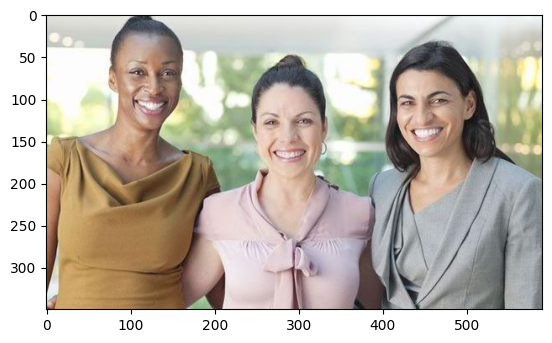

In [7]:
img=cv2.imread(os.path.join(data_dir,'happy','1-2.jpg'))
# print(img)
# img.shape
# plt.imshow(img) #open cv reads image in bgr that  is why ajeeb color comes
 # and pil shows image in rgb
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [8]:
s=256
b=10
c=3
datasets=tf.keras.utils.image_dataset_from_directory(
    "Faceexpression",
    image_size=(s,s),
    batch_size=b,
    shuffle=True,
)

Found 305 files belonging to 2 classes.


In [189]:
labels=[i for i in datasets.class_names]
labels

['happy', 'sad']

In [10]:
len(datasets)

31

In [11]:
data_augmentation= Sequential([
 layers.RandomFlip('horizontal_and_vertical'),
layers.RandomRotation(0.2),
])

In [12]:
resize_and_rescale=Sequential([
    layers.Resizing(s,s),
    layers.Rescaling(1.0/255)
])

In [13]:
def get(d,l):
    trs=int(0.8*l)
    vals=int(0.1*l)
    train=d.take(trs)
    valid=d.skip(trs).take(vals)
    test=d.skip(trs).skip(vals)
    return train,valid,test
traind,vald,testd=get(datasets,len(datasets))
len(traind),len(vald),len(testd)

(24, 3, 4)

In [14]:
train=traind.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
valid=vald.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
test=testd.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [1]:
input=(b,s,s,c)
nclasses=1
model=models.Sequential([
    data_augmentation,
    resize_and_rescale,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(nclasses,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



NameError: name 'b' is not defined

In [16]:
EPOCHS=50
model.fit(traind,epochs=EPOCHS,batch_size=b, verbose=1)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 542ms/step - accuracy: 0.5917 - loss: 1.2715
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 613ms/step - accuracy: 0.7341 - loss: 0.5615
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 581ms/step - accuracy: 0.7703 - loss: 0.4585
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 588ms/step - accuracy: 0.7189 - loss: 0.5314
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 796ms/step - accuracy: 0.8211 - loss: 0.4387
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 811ms/step - accuracy: 0.8227 - loss: 0.4928
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 774ms/step - accuracy: 0.8048 - loss: 0.4245
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 809ms/step - accuracy: 0.8423 - loss: 0.3828
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 757ms/step - accuracy: 0.7907 - loss: 0.3875
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 770ms/step - accuracy: 0.8441 - loss: 0.3817
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 810ms/step - accuracy: 0.7987 - loss: 0.4086
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 15

In [17]:
print(model.evaluate(vald))

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9000 - loss: 0.2129
[0.20376919209957123, 0.8999999761581421]


In [18]:
print(model.evaluate(testd))

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - accuracy: 0.8795 - loss: 0.2394
[0.24828879535198212, 0.8571428656578064]


In [172]:
pred=model.predict(testd)
yp=[1 if i>0.5 else 0 for i in pred]
ytrue=list([j.numpy() for i,j in testd][0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step


[0, 1, 1, 0, 1, 1, 0, 1, 0, 0]

In [89]:
yp[:2],len(testd)*b

([0, 0], 40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted class is tf.Tensor(1, shape=(), dtype=int32)


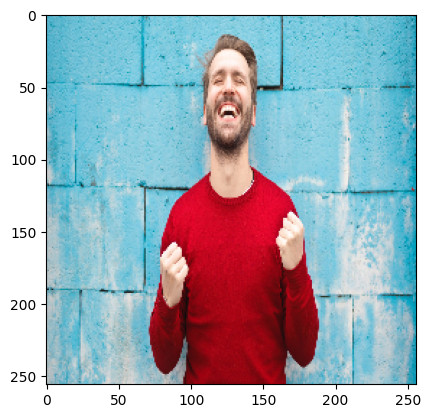

In [157]:
i=cv2.imread('how-to-be-happy.jpg')
i=cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
# plt.imshow(cv2.cvtColor(i,cv2.COLOR_BGR2RGB))
# i=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
i=cv2.resize(i,(s,s))
i=i/255
plt.imshow(i)
i=np.expand_dims(i,axis=0)
output=np.argmax(model.predict(i))
print('predicted class is',labels[output])


In [178]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [180]:
for batch in testd.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.6818182, shape=(), dtype=float32) tf.Tensor(0.9, shape=(), dtype=float32)


In [183]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 0.6818182 0.9


In [193]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=labels[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


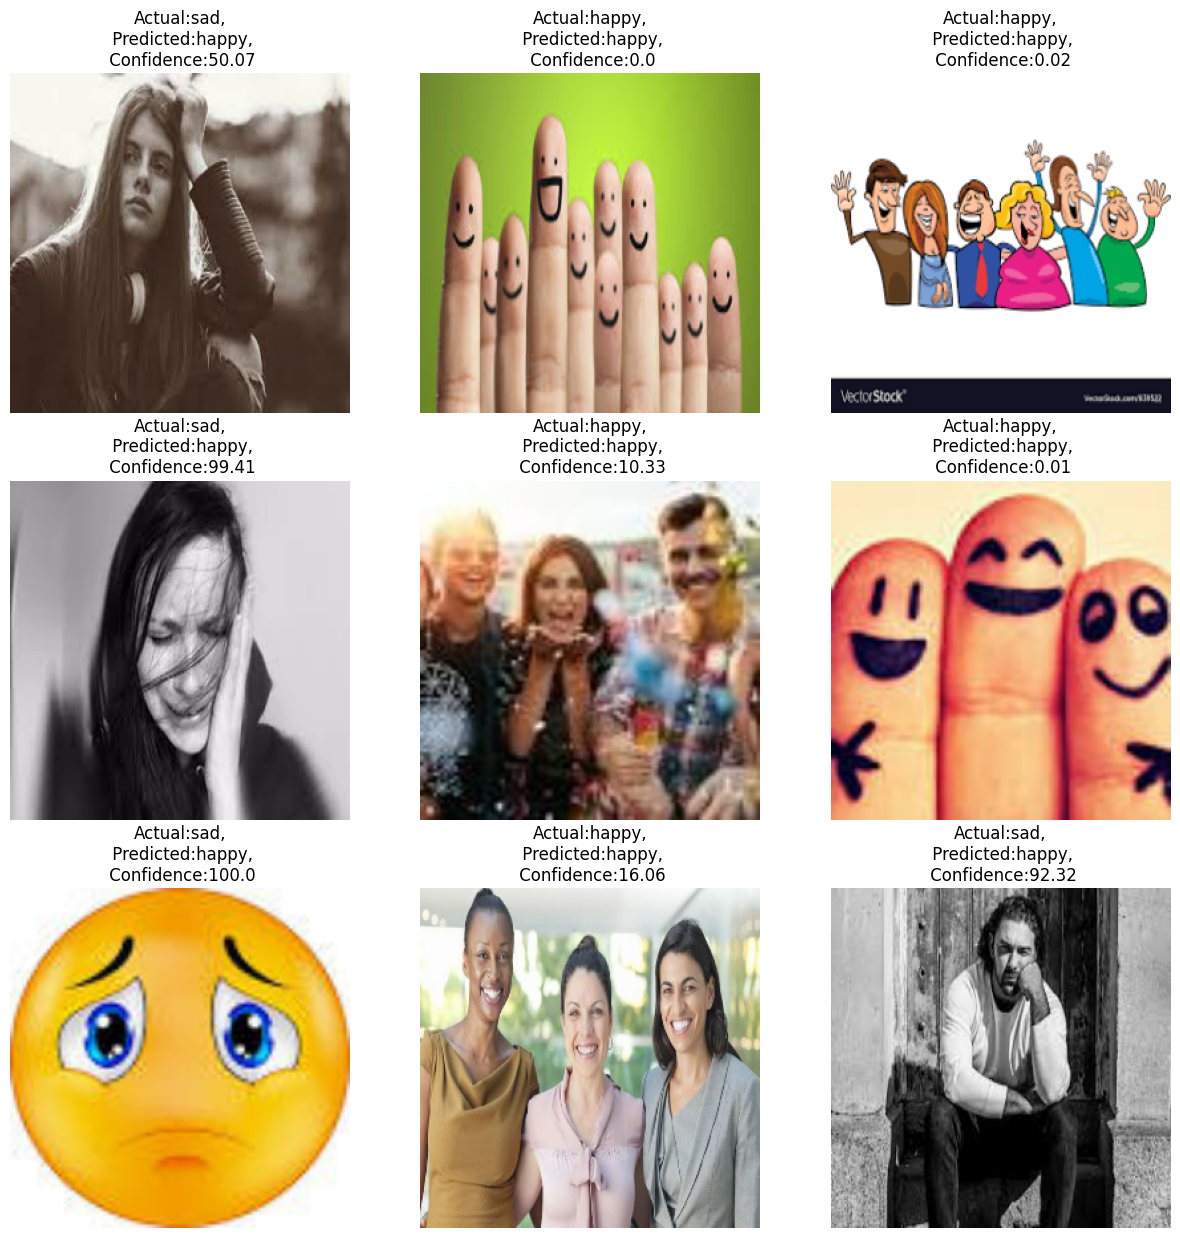

In [196]:
plt.figure(figsize=(15,15))
for image ,label in testd.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        predicted_class,confidence=predict(model,image[i].numpy())
        actual_class=labels[label[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidence:{confidence}")
        plt.axis("off")
        

In [1]:
model.save('happorsad.keras')

NameError: name 'model' is not defined